In [1]:
from const import globs
import ipykernel
ipykernel.__version__

D, V, M, k, gamma = globs('l')

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

From now on let's use the following simulated data for further testing

In [3]:
from simulator import Simulator
from samplers import MC_sample_Z, MC_sample_B, MC_sample_H, MC_sample_GK
from transformation_functions import update_Theta, update_Sigma, update_E, update_C
from generator_functions import sample_Z_from_W
from graph_loss import permutation_topics, graph_loss

# 3. MAIN CYCLE TESTS

### Generating Target Data

These data will be used as input (matrix Z and W) and target (matrix G) for our simulation. 

In [4]:
simulated_data = Simulator(D, V, M, k, gamma, seed=1888)
simulated_data.generate_all_data()

Success: Sigma transformed from K
Success: G transformed from K
Success: W and Z generated
Success: E transformed from Z
Success: C transformed from Z


In [5]:
# Input Data:
simulated_data.W

array([[2., 1., 3., ..., 5., 2., 0.],
       [3., 3., 2., ..., 2., 4., 2.],
       [1., 1., 1., ..., 2., 2., 0.],
       ...,
       [0., 2., 0., ..., 1., 0., 1.],
       [2., 2., 0., ..., 2., 1., 3.],
       [2., 1., 0., ..., 1., 2., 3.]])

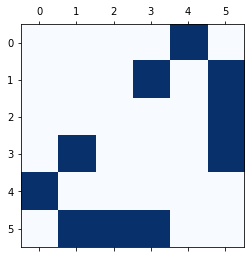

In [6]:
# Target graph
plt.matshow(simulated_data.G, cmap='Blues')

### Generating Initial Data

These are used as our initial guess for Sigma, K, B, Theta and G

Success: G transformed from K
Success: E transformed from Z
Success: C transformed from Z


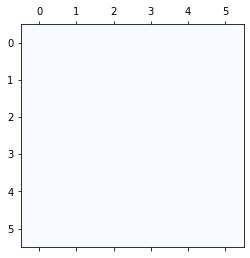

In [7]:
# Initial guesses
initial = Simulator(D, V, M, k, gamma, 2020)
initial.generate_non_informative(simulated_data.W)

# Initial graph
plt.matshow(initial.G, cmap='Blues')

## 3.1 Test graph loss

We use the true versions of the data that isn't related to B, G

In [8]:
%%time
max_iterations = 5000
np.random.seed(25041945)

# Initialization
Sigma = initial.Sigma.copy()
K = np.linalg.inv(Sigma)
B = initial.B.copy()
Theta = initial.Theta.copy()
G = initial.G.copy()

alpha = np.ones(V)  # Uninformative prior
b = k - 1

# Skipping part
Z = initial.Z.copy()
E = initial.E.copy()
C = initial.C.copy()

H = initial.H.copy()
Theta = update_Theta(Theta, H)  # get Theta from H

step = 0.5

# Metrics

Zerrors1 = []

Berrors1 = []
B_converge1 = [] 

waiting_times1 = []
sampled_Gs1 = []
graph_changes1 = []
edges_log1 = []
errors_log1 = []


sampled_Bs = []
permutations = []
waiting_times = []
sampled_Gs = []
graph_losses = []

permutations = []


for iteration in range(max_iterations):
    
    # Step 1
    Z, E, C = MC_sample_Z(Z, simulated_data.W, Theta, B, E, C, debug=True) 
    
    # Step 2
    B = MC_sample_B(alpha, C)
    sampled_Bs.append(B)
    
    permute = permutation_topics(B_true=simulated_data.B, B_sampled=B)
    permutations.append(permute)
    
    print(permute)
    
    # Step 3
    #H = MC_sample_H(E, Sigma, K, H_current=H, burn_in=10)
    H, step = MC_sample_H(E, Sigma, K, step_size=step, H_current=H, burn_in=15)
    Theta = update_Theta(Theta, H)  # get Theta from H
    
    # Step 4    
    G_old = G.copy()
    wt_sample, G_new, K = MC_sample_GK(G, H, b, debug=False)
    
    G = G_new
    Sigma = np.linalg.inv(K)
    
    waiting_times.append(wt_sample)
    sampled_Gs.append(G.copy())
    
    graph_losss = graph_loss(G_true=simulated_data.G, G_sampled=G, permutation=permute)
    graph_losses.append(graph_losss)
    
    if iteration % 100 == 0:  # Plot every 20 iterations
        print('Finished iteration '+str(iteration))
        #plt.matshow(G, cmap='Blues')
        #plt.suptitle("Graph of iteration " + str(iteration), x=0.5, y=1, ha='center')
        #plt.show()

Distances for 0
0.059748828856540176
Distances for 0
0.056441968920617314
Distances for 0
0.08429668817245704
Distances for 0
0.08629485690685434
Distances for 0
0.07827081775209054
Distances for 0
0.07039110638024493
Distances for 1
0.06197796118470743
Distances for 1
0.06058252565634785
Distances for 1
0.07738726811982641
Distances for 1
0.06560089842956594
Distances for 1
0.055129651446621436
Distances for 2
0.06354537464332992
Distances for 2
0.04667177815113027
Distances for 2
0.08822543708036827
Distances for 2
0.05950193814751498
Distances for 3
0.10493287101674725
Distances for 3
0.07061433588581446
Distances for 3
0.1352800939581964
Distances for 4
0.09417602960423073
Distances for 4
0.1395060517132258
Distances for 5
0.07058326225010807
[1.0, 5.0, 2.0, 3.0, 0.0, 4.0]
Finished iteration 0
Distances for 0
0.0786450605116878
Distances for 0
0.06404963845501117
Distances for 0
0.09971831904981147
Distances for 0
0.07672042930240258
Distances for 0
0.06984190275689382
Distances fo

/Users/caspar/Desktop/Bayesian Project/BAY-STATS-Project-ABDPPS/samplers.py:100: RuntimeWarning: overflow encountered in exp
  sum_eta = np.sum(np.exp(eta))


Distances for 0
0.13450470987924645
Distances for 0
0.06068465338172652
Distances for 0
0.10675380415760362
Distances for 0
0.06513296311361978
Distances for 0
0.06461076757771307
Distances for 0
0.07198052068597738
Distances for 1
0.0886414447622841
Distances for 1
0.06503449082940908
Distances for 1
0.04633445369015362
Distances for 1
0.07258444260012131
Distances for 1
0.09362828608044826
Distances for 2
0.08327743791190363
Distances for 2
0.040020627690223645
Distances for 2
0.09280519271169893
Distances for 2
0.08321851379472961
Distances for 3
0.16140197193009215
Distances for 3
0.07027220401863543
Distances for 3
0.07689887762733694
Distances for 4
0.12688612575955535
Distances for 4
0.07182758422624934
Distances for 5
0.09076492463027952
[1.0, 3.0, 2.0, 4.0, 5.0, 0.0]
Distances for 0
0.08551332153555151
Distances for 0
0.05484551967765242
Distances for 0
0.08430312294535071
Distances for 0
0.05705953133784509
Distances for 0
0.057783253547255845
Distances for 0
0.06284330107168

In [9]:
B_True = simulated_data.B.copy()
B_True_Permuted = B_True.copy()

B_True_Permuted[0] = B_True[1].copy()
B_True_Permuted[1] = B_True[0].copy()

permute = permutation_topics(B_true=B_True, B_sampled=B_True_Permuted)
print(permute)

Distances for 0
0.0791473308298284
Distances for 0
0.0
Distances for 0
0.09723953154109825
Distances for 0
0.08947269079685631
Distances for 0
0.13353692924687235
Distances for 0
0.10921628475716556
Distances for 1
0.0
Distances for 1
0.06251410321059545
Distances for 1
0.12431051926464623
Distances for 1
0.10972560660778226
Distances for 1
0.0900158706243415
Distances for 2
0.0
Distances for 2
0.12343007333093255
Distances for 2
0.09107488802339048
Distances for 2
0.09400626743280872
Distances for 3
0.0
Distances for 3
0.12360572232884659
Distances for 3
0.1500371364592987
Distances for 4
0.0
Distances for 4
0.15051055939162244
Distances for 5
0.0
[1.0, 0.0, 2.0, 3.0, 4.0, 5.0]


Graph loss metrics
count    5000.00000
mean        6.27660
std         1.31432
min         3.00000
25%         5.00000
50%         6.50000
75%         7.50000
max        10.50000
dtype: float64


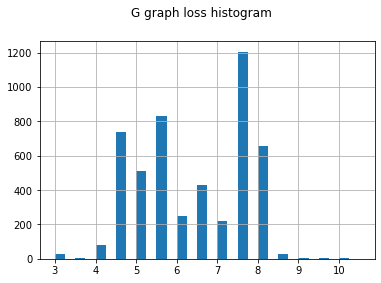

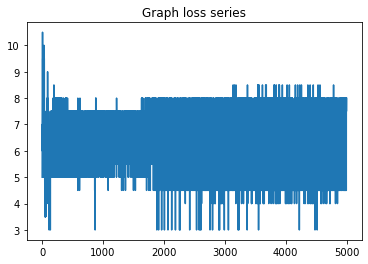

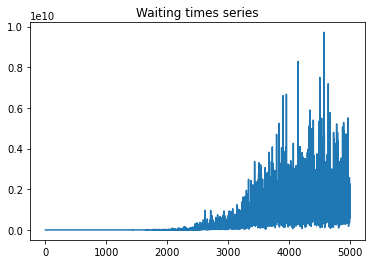

In [10]:
graph_loss = pd.Series(graph_losses)

print("Graph loss metrics")
print(graph_loss.describe())

graph_loss.hist(bins=30)
plt.suptitle('G graph loss histogram', x=0.5, y=1, ha='center')
plt.show()

graph_loss.plot(title="Graph loss series")
plt.show()

wait_times = pd.Series(waiting_times)
wait_times.plot(title="Waiting times series")
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

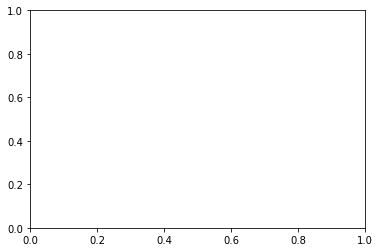

In [11]:
import seaborn as sn
fig, ax = plt.subplots(1,1)
sn.heatmap(permutations, cmap='Blues',ax=ax[0])

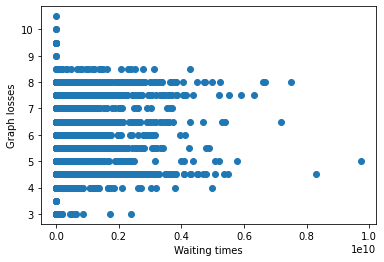

In [13]:
plt.scatter(wait_times, graph_loss)
plt.xlabel('Waiting times')
plt.ylabel('Graph losses')
plt.show()

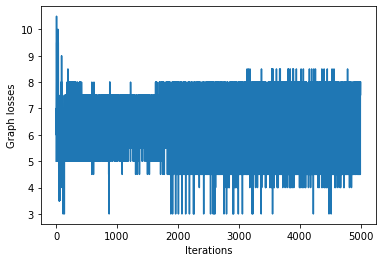

In [18]:
plt.plot(graph_losses)
plt.xlabel('Iterations')
plt.ylabel('Graph losses')
plt.show()